#  <h1 style="text-align:center;">Lab-Assignment - 3_1</h1>

Regularization

In [1]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
# load the dataset
df= pd.read_csv(r"C:\Users\raval\Downloads\bike+sharing+dataset\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
X = df[["weekday","temp","weathersit","atemp","hum","windspeed"]]
y= df["cnt"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [12]:
# Lasso Regression
alpha_lasso = 1.0  # Regularization strength for Lasso
lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Mean Squared Error (MSE): {mse_lasso}')

# Ridge Regression
alpha_ridge = 1.0  # Regularization strength for Ridge
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Mean Squared Error (MSE): {mse_ridge}')

# Elastic Net
alpha_elastic = 1.0  # Regularization strength for Elastic Net
l1_ratio = 0.5  # Mixing parameter for Elastic Net (0.0 for L2, 1.0 for L1)
elastic_net_model = ElasticNet(alpha=alpha_elastic, l1_ratio=l1_ratio)
elastic_net_model.fit(X_train, y_train)

y_pred_elastic = elastic_net_model.predict(X_test)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
print(f'Elastic Net Mean Squared Error (MSE): {mse_elastic}')

Lasso Mean Squared Error (MSE): 1966826.4243399801
Ridge Mean Squared Error (MSE): 1966601.4264985875
Elastic Net Mean Squared Error (MSE): 2117213.884175252


In [32]:
reg = LinearRegression().fit(X_train, y_train)

In [33]:
reg.score(X_test, y_test)

0.5096989557230602

In [34]:
reg.score(X_train, y_train)

0.4664063098127508

In [35]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 10)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=10)

In [36]:
lasso_reg.score(X_test, y_test)

0.5077465419959204

In [37]:
lasso_reg.score(X_train, y_train)

0.46628542789501115

In [38]:
ridge_reg = Ridge(alpha = 10)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=10)

In [39]:
ridge_reg.score(X_test, y_test)

0.5085742314214189

In [40]:
ridge_reg.score(X_train, y_train)

0.46633568986780494

In [42]:
# Train the linear regression model
model = LinearRegression()
reg1 = model.fit(X_train, y_train)

# Predict bike rentals
y_pred = model.predict(X_test)

In [43]:
reg1.score(X_test,y_test)

0.5096989557230602

In [44]:
reg1.score(X_train,y_train)

0.4664063098127508

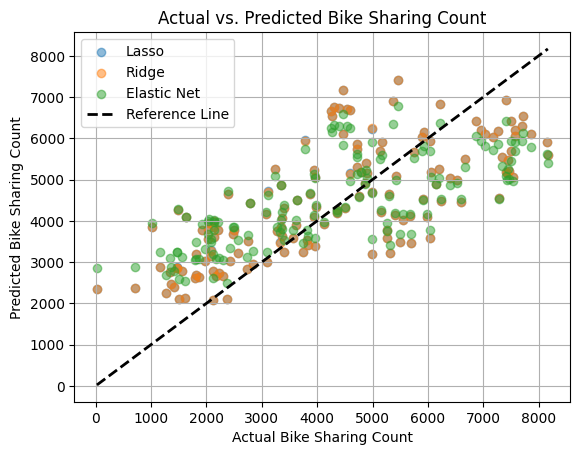

In [45]:
import matplotlib.pyplot as plt

# Create a scatter plot of the actual data points
plt.scatter(y_test, y_pred_lasso, label="Lasso", alpha=0.5)
plt.scatter(y_test, y_pred_ridge, label="Ridge", alpha=0.5)
plt.scatter(y_test, y_pred_elastic, label="Elastic Net", alpha=0.5)

# Add a reference line (y = x) for comparison
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label="Reference Line")

plt.xlabel("Actual Bike Sharing Count")
plt.ylabel("Predicted Bike Sharing Count")
plt.title("Actual vs. Predicted Bike Sharing Count")
plt.legend()
plt.grid(True)
plt.show()


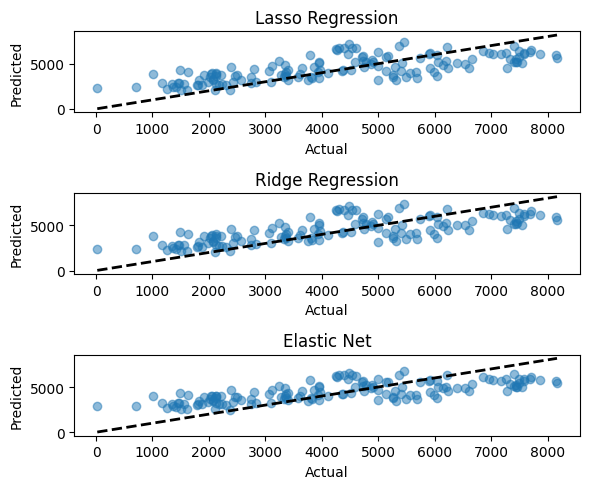

In [52]:
import matplotlib.pyplot as plt

# Create separate scatter plots for each regularization method
plt.figure(figsize=(6, 5))

# Lasso Regression
plt.subplot(3,1, 1)
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Lasso Regression")

# Ridge Regression
plt.subplot(3,1, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge Regression")

# Elastic Net
plt.subplot(3,1, 3)
plt.scatter(y_test, y_pred_elastic, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Elastic Net")

plt.tight_layout()
plt.show()

In [57]:
# Define the Lasso regression function
def lasso_regression(X, y, alpha, num_iterations, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    for iteration in range(num_iterations):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradient = X.T.dot(error) / m + alpha * np.sign(theta) / m
        theta -= learning_rate * gradient
    return theta

In [65]:
lasso_regression(X, y, alpha=0.1, num_iterations=100, learning_rate=0.1)

weekday        206.092592
temp          2881.229471
weathersit      23.656667
atemp         2700.630830
hum           1421.308725
windspeed      396.650138
dtype: float64

In [66]:
lasso_regression(X, y, alpha=10, num_iterations=100, learning_rate=0.1)

weekday        206.102218
temp          2881.186220
weathersit      23.688560
atemp         2700.582506
hum           1421.265882
windspeed      396.544411
dtype: float64

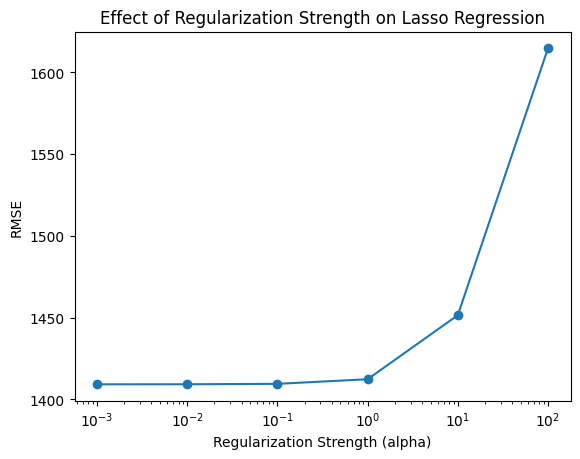

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X = df[['temp', 'weathersit', 'hum', 'windspeed']]
y = df['cnt']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of regularization strengths (alpha values)
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a dictionary to store RMSE scores for each alpha
rmse_scores = {}

# Iterate through regularization strengths
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[alpha] = rmse

# Plot the RMSE curve
plt.plot(alphas, list(rmse_scores.values()), marker='o')
plt.xscale('log')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('RMSE')
plt.title('Effect of Regularization Strength on Lasso Regression')
plt.show()

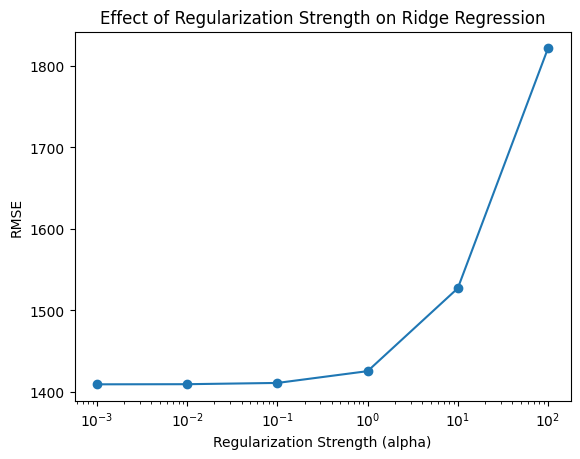

In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X = df[['temp', 'weathersit', 'hum', 'windspeed']]
y = df['cnt']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of regularization strengths (alpha values)
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a dictionary to store RMSE scores for each alpha
rmse_scores = {}

# Iterate through regularization strengths
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[alpha] = rmse

# Plot the RMSE curve
plt.plot(alphas, list(rmse_scores.values()), marker='o')
plt.xscale('log')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('RMSE')
plt.title('Effect of Regularization Strength on Ridge Regression')
plt.show()

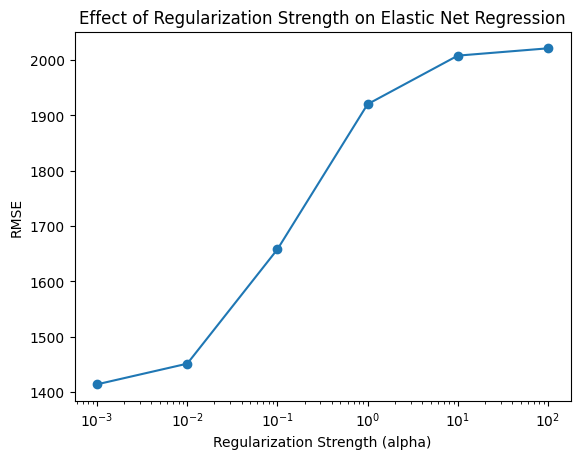

In [69]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X = df[['temp', 'weathersit', 'hum', 'windspeed']]
y = df['cnt']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of regularization strengths (alpha values)
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a dictionary to store RMSE scores for each alpha
rmse_scores = {}

# Iterate through regularization strengths
for alpha in alphas:
    model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # l1_ratio=0.5 means equal combination of L1 and L2 penalties (Elastic Net)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[alpha] = rmse

# Plot the RMSE curve
plt.plot(alphas, list(rmse_scores.values()), marker='o')
plt.xscale('log')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('RMSE')
plt.title('Effect of Regularization Strength on Elastic Net Regression')
plt.show()